## **Praktikum Teknik Pengkodean Sumber dan Kanal**



---



* Nama: Rifko Satrio Rahmadani
* NIM: 231344057
* Kelas: 3B-TNK


## Modul 8: Tunstall Coding

# Instruksi!

Sebelum melakukan pekerjaan di bawah, ada beberapa hal yang harus diperhatikan.

* Waktu pengerjaan sesuai dengan deadline pada GCR.
* GCR akan ditutup setelah jam tersebut.
* Waktu submit ke GCR berpengaruh pada nilai, lebih cepat akan mendapat nilai tambahan.
* Jika ada kendala saat upload file ipynb, maka bisa dengan menyematkan link google collabnya pada kolom submission tugas di GCR.
* Jika ada pertanyaan bisa diajukan di grup perkuliahan.

*selamat mengerjakan*

## Tunstall Coding

Tunstall coding adalah salah satu metode kompresi sumber tanpa kehilangan data (lossless compression) yang digunakan dalam teori pengkodean sumber. Algoritma ini termasuk dalam kelompok variable-to-fixed length coding, artinya panjang simbol masukan (input) bisa berubah-ubah, tetapi panjang kode keluaran (output codeword) selalu tetap.

Metode ini pertama kali diperkenalkan oleh Brian P. Tunstall pada tahun 1967, dan sering digunakan dalam konteks pemrosesan teks, kompresi data, serta sistem komunikasi digital, di mana efisiensi pengkodean dan dekompresi cepat menjadi penting.

**Penjelasan Sederhana**

Bayangkan kamu punya deretan simbol (misalnya huruf atau angka) yang sering muncul berulang-ulang.
Tujuan Tunstall coding adalah untuk mengganti urutan simbol-simbol yang sering muncul dengan kode biner yang panjangnya tetap, agar total bit yang dikirim lebih sedikit.

Langkah dasar Tunstall coding:

Mulai dengan simbol dasar (alphabet) dari sumber data, misalnya {A, B}.

Bangun pohon (Tunstall tree) dengan memperluas node yang paling sering muncul, menggunakan probabilitas kemunculan tiap simbol.

Proses perluasan terus dilakukan sampai jumlah leaf node (daun) mencapai batas yang ditentukan.

Setiap daun akan diberi kode biner dengan panjang tetap, misalnya 3 bit untuk 8 daun.

Dalam pengkodean, setiap urutan simbol akan diganti dengan kode tetap tersebut.

### Membuat Symbol Counter

**Syarat:**

- Hanya alfabet dan angka yang muncul saja yang dihitung
- Huruf besar (uppercase) dan huruf kecil (lowercase) dianggap sama
- Diluar alfabet dan angka tidak menjadi perhitungan frekuensi

**Algoritma**
1. Deklarasikan variabel untuk menyimpan simbol, dan untuk menyimpan frekuensi.
2. Loop datastream
3. Setiap datastream di-cek apakah ada didalam list simbol
4. Cek apakah datastream merupakan alfabet
5. Jika ya, maka lanjutkan ke proses selanjutnya.
6. Jika tidak, maka lanjutkan ke iterasi berikutnya.
7. Jika ya, maka frekuensi pada indeks simbol tersebut bertambah 1
8. Jika tidak, maka tambahkan simbol tersebut kedalam list simbol, dan tambahkan pada list frekuensi juga.



In [ ]:
def hitung_simbol(datastream):
  simbol = []
  frekuensi = []
  jumlah_simbol = 0

  #deklarasikan variabel untuk menyimpan simbol dan frekuensi
  #loop datastream
  datastream = datastream.lower()   #paksa ubah datastream ke lowercase/uppercase

  for i in range(len(datastream)):
    #dicek apakah datastream[i] itu ialah alfabet atau angka .isalpha() .isnumeric()
    if datastream[i].isalpha() or datastream[i].isnumeric():
      #masukkan counter untuk jumlah simbol
      jumlah_simbol += 1

      #dicek apakah datastream[i] ada di list simbol
      #-> jangan lupa untuk memaksa alfabet ke huruf kecil atau huruf besar .upper() .lower()
      if datastream[i] in simbol:
        #jika ya, maka frekuensi simbol bertambah
        index_simbol = simbol.index(datastream[i])
        frekuensi[index_simbol] += 1
      else:
        #jika tidak, maka append simbol baru ke dalam list simbol dan juga list frekuensi
        #gunakan .append() -> simbol dan frekuensi (.append(1))
        simbol.append(datastream[i])
        frekuensi.append(1)

  return simbol, frekuensi, jumlah_simbol

Program `hitung_simbol(datastream)` ini digunakan buat ngitung seberapa sering huruf atau angka muncul dalam sebuah teks. Pertama, semua huruf diubah jadi huruf kecil biar gak beda antara huruf besar dan kecil. Setelah itu, tiap karakter dicek — kalau itu huruf atau angka, maka akan dihitung. Kalau simbolnya udah pernah muncul, jumlahnya ditambah, tapi kalau belum, dimasukin ke daftar baru. Di akhir, program bakal nampilin daftar simbol unik, jumlah kemunculannya, dan total simbol yang berhasil dihitung.

Lampirkan gambar flowchart dari symbol counter simbol di bawah ini:

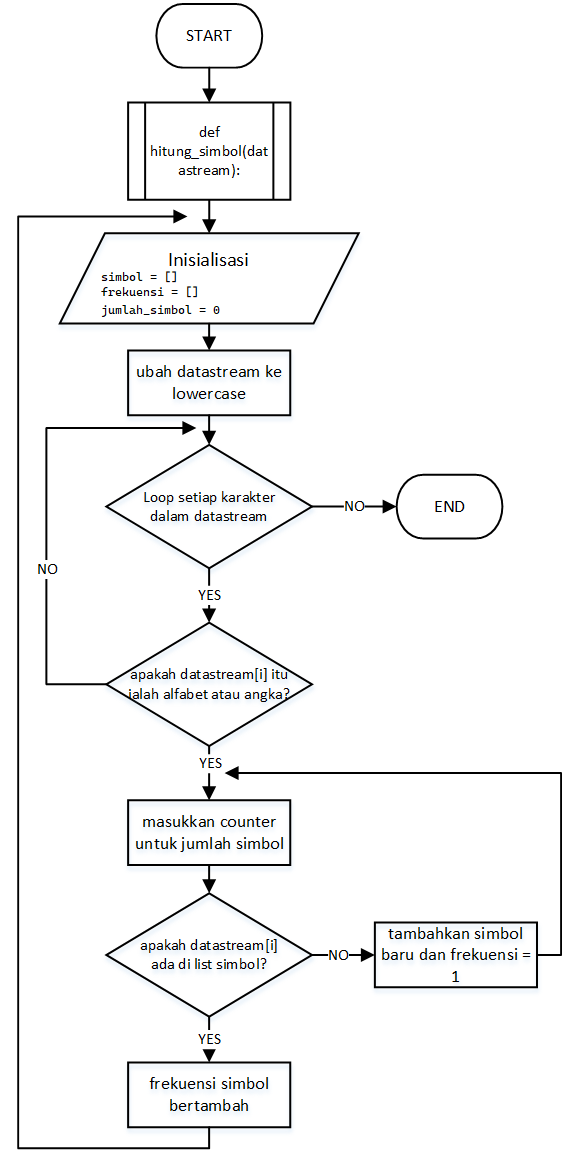

### Menghitung Probabilitas Simbol

In [ ]:
#buat program disini
import numpy as np
#np.array -> list -> numeric array
a = np.array(frekuensi)
probabilitas = a / np.sum(a)

### Test Program disini

```python
input = 'As we can see, the read will result in the first digit being 'B' - 25% of the time as it has an implied probability of 25%, being of length 2 trying to read from implied data. '
```

In [ ]:
datastream = input("Masukkan data disini: ")
#panggil fungsi
simbol, frekuensi, jumlah_simbol = hitung_simbol(datastream)
#hitung probabilitas
#print list simbol dan frekuensi
print("Simbol :", simbol)
print("Frekuensi :", frekuensi)
print("Jumlah simbolnya :", jumlah_simbol)
print("Probabilitas :", probabilitas)

Masukkan data disini: As we can see, the read will result in the first digit being 'B' - 25% of the time as it has an implied probability of 25%, being of length 2 trying to read from implied data.
Simbol : ['a', 's', 'w', 'e', 'c', 'n', 't', 'h', 'r', 'd', 'i', 'l', 'u', 'f', 'g', 'b', '2', '5', 'o', 'm', 'p', 'y']
Frekuensi : [10, 6, 2, 15, 1, 7, 13, 5, 7, 6, 16, 7, 1, 5, 5, 5, 3, 2, 6, 4, 3, 2]
Jumlah simbolnya : 131
Probabilitas : [0.07633588 0.04580153 0.01526718 0.11450382 0.00763359 0.05343511
 0.09923664 0.03816794 0.05343511 0.04580153 0.1221374  0.05343511
 0.00763359 0.03816794 0.03816794 0.03816794 0.02290076 0.01526718
 0.04580153 0.03053435 0.02290076 0.01526718]
